In [71]:
import warnings
warnings.filterwarnings('ignore')

## Import Libraries

import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [72]:
## Read dataset

data_train=pd.read_csv("train.csv")
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## EDA

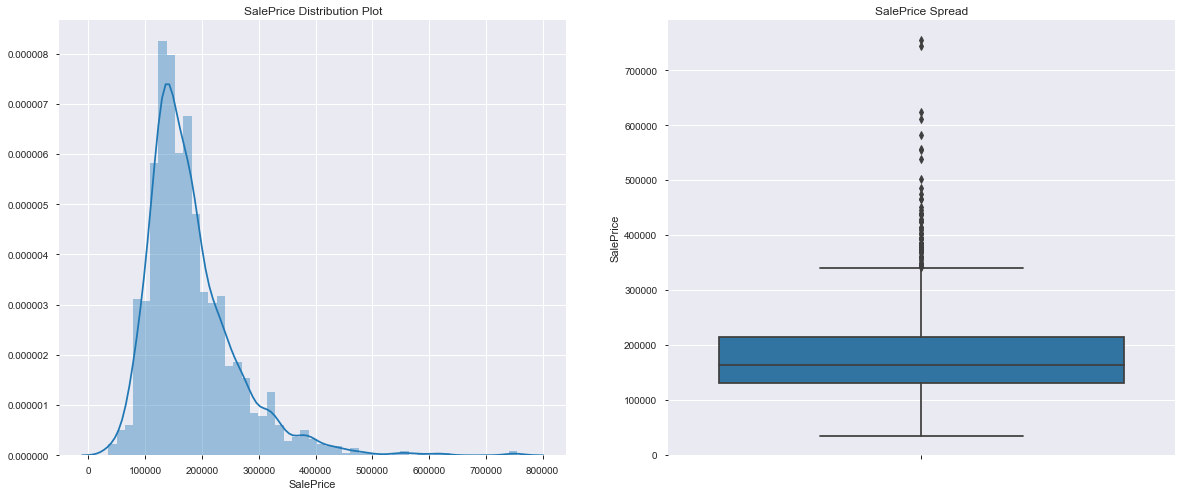

In [73]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('SalePrice Distribution Plot')
sns.distplot(data_train.SalePrice)

plt.subplot(1,2,2)
plt.title('SalePrice Spread')
sns.boxplot(y=data_train.SalePrice)

plt.show()

In [85]:
print(data_train.SalePrice.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
85%      250000.000000
90%      278000.000000
100%     755000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [75]:
profile=ProfileReport(data_train)
profile

Number of variables,81
Number of observations,1460
Total Missing (%),5.9%
Total size in memory,924.0 KiB
Average record size in memory,648.1 B
Numeric,38
Categorical,43
Boolean,0
Date,0
Text (Unique),0
Rejected,0


### Handling Missing Values

In [91]:
## Calculate Missing values percentage 
total = data_train.isnull().sum().sort_values(ascending=False)
percent = (data_train.isnull().sum()/data_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)



0

In [ ]:
#dealing with missing data
data_train = data_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
data_train = data_train.drop(data_train.loc[data_train['Electrical'].isnull()].index)
data_train.drop(columns=['Id'],inplace=True)
data_train.isnull().sum().max() #just checking that there's no missing data missing...


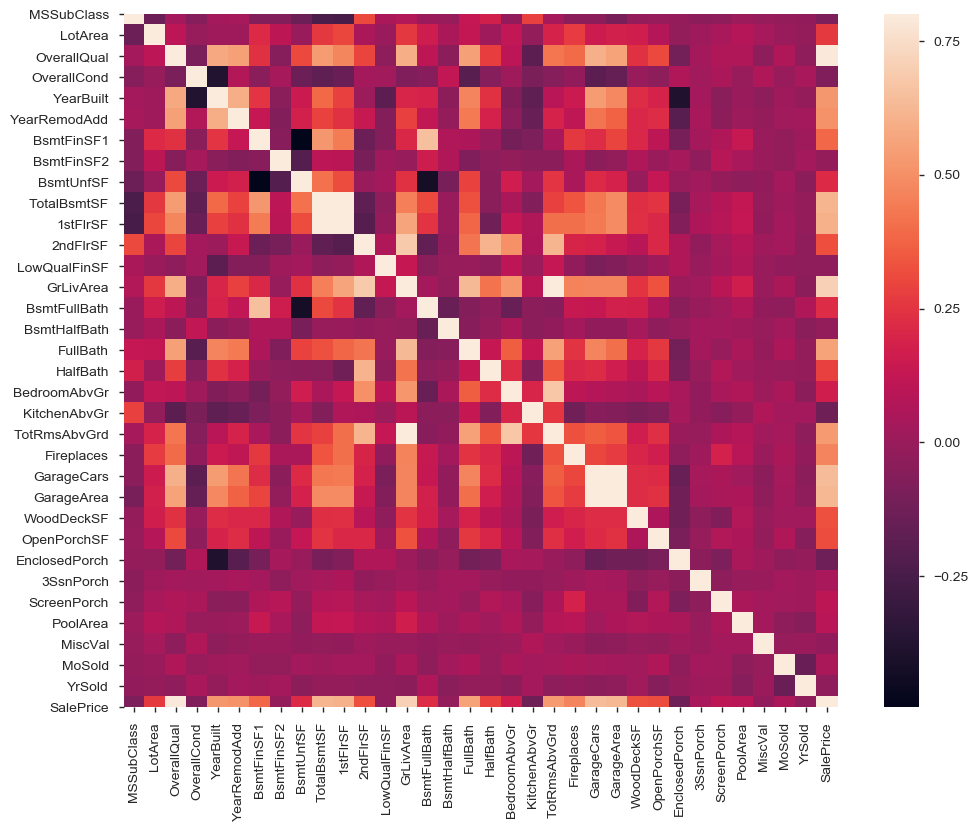

In [92]:
#correlation matrix
corrmat = data_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

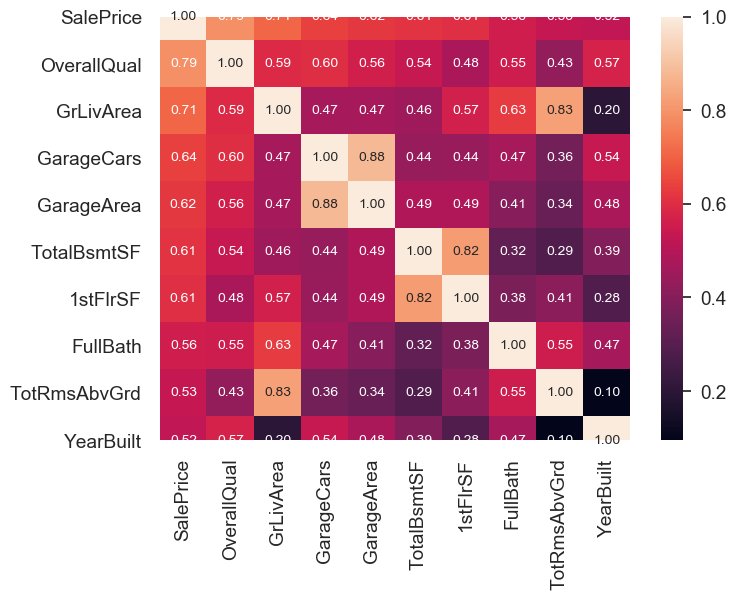

In [93]:
#saleprice correlation matrix most co-related
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Infer

1. GrLivArea and GarageCars are highly co-related we can take one features
2. GrLivArea and TotRmsAbvGrd are highly co-related we can take one features

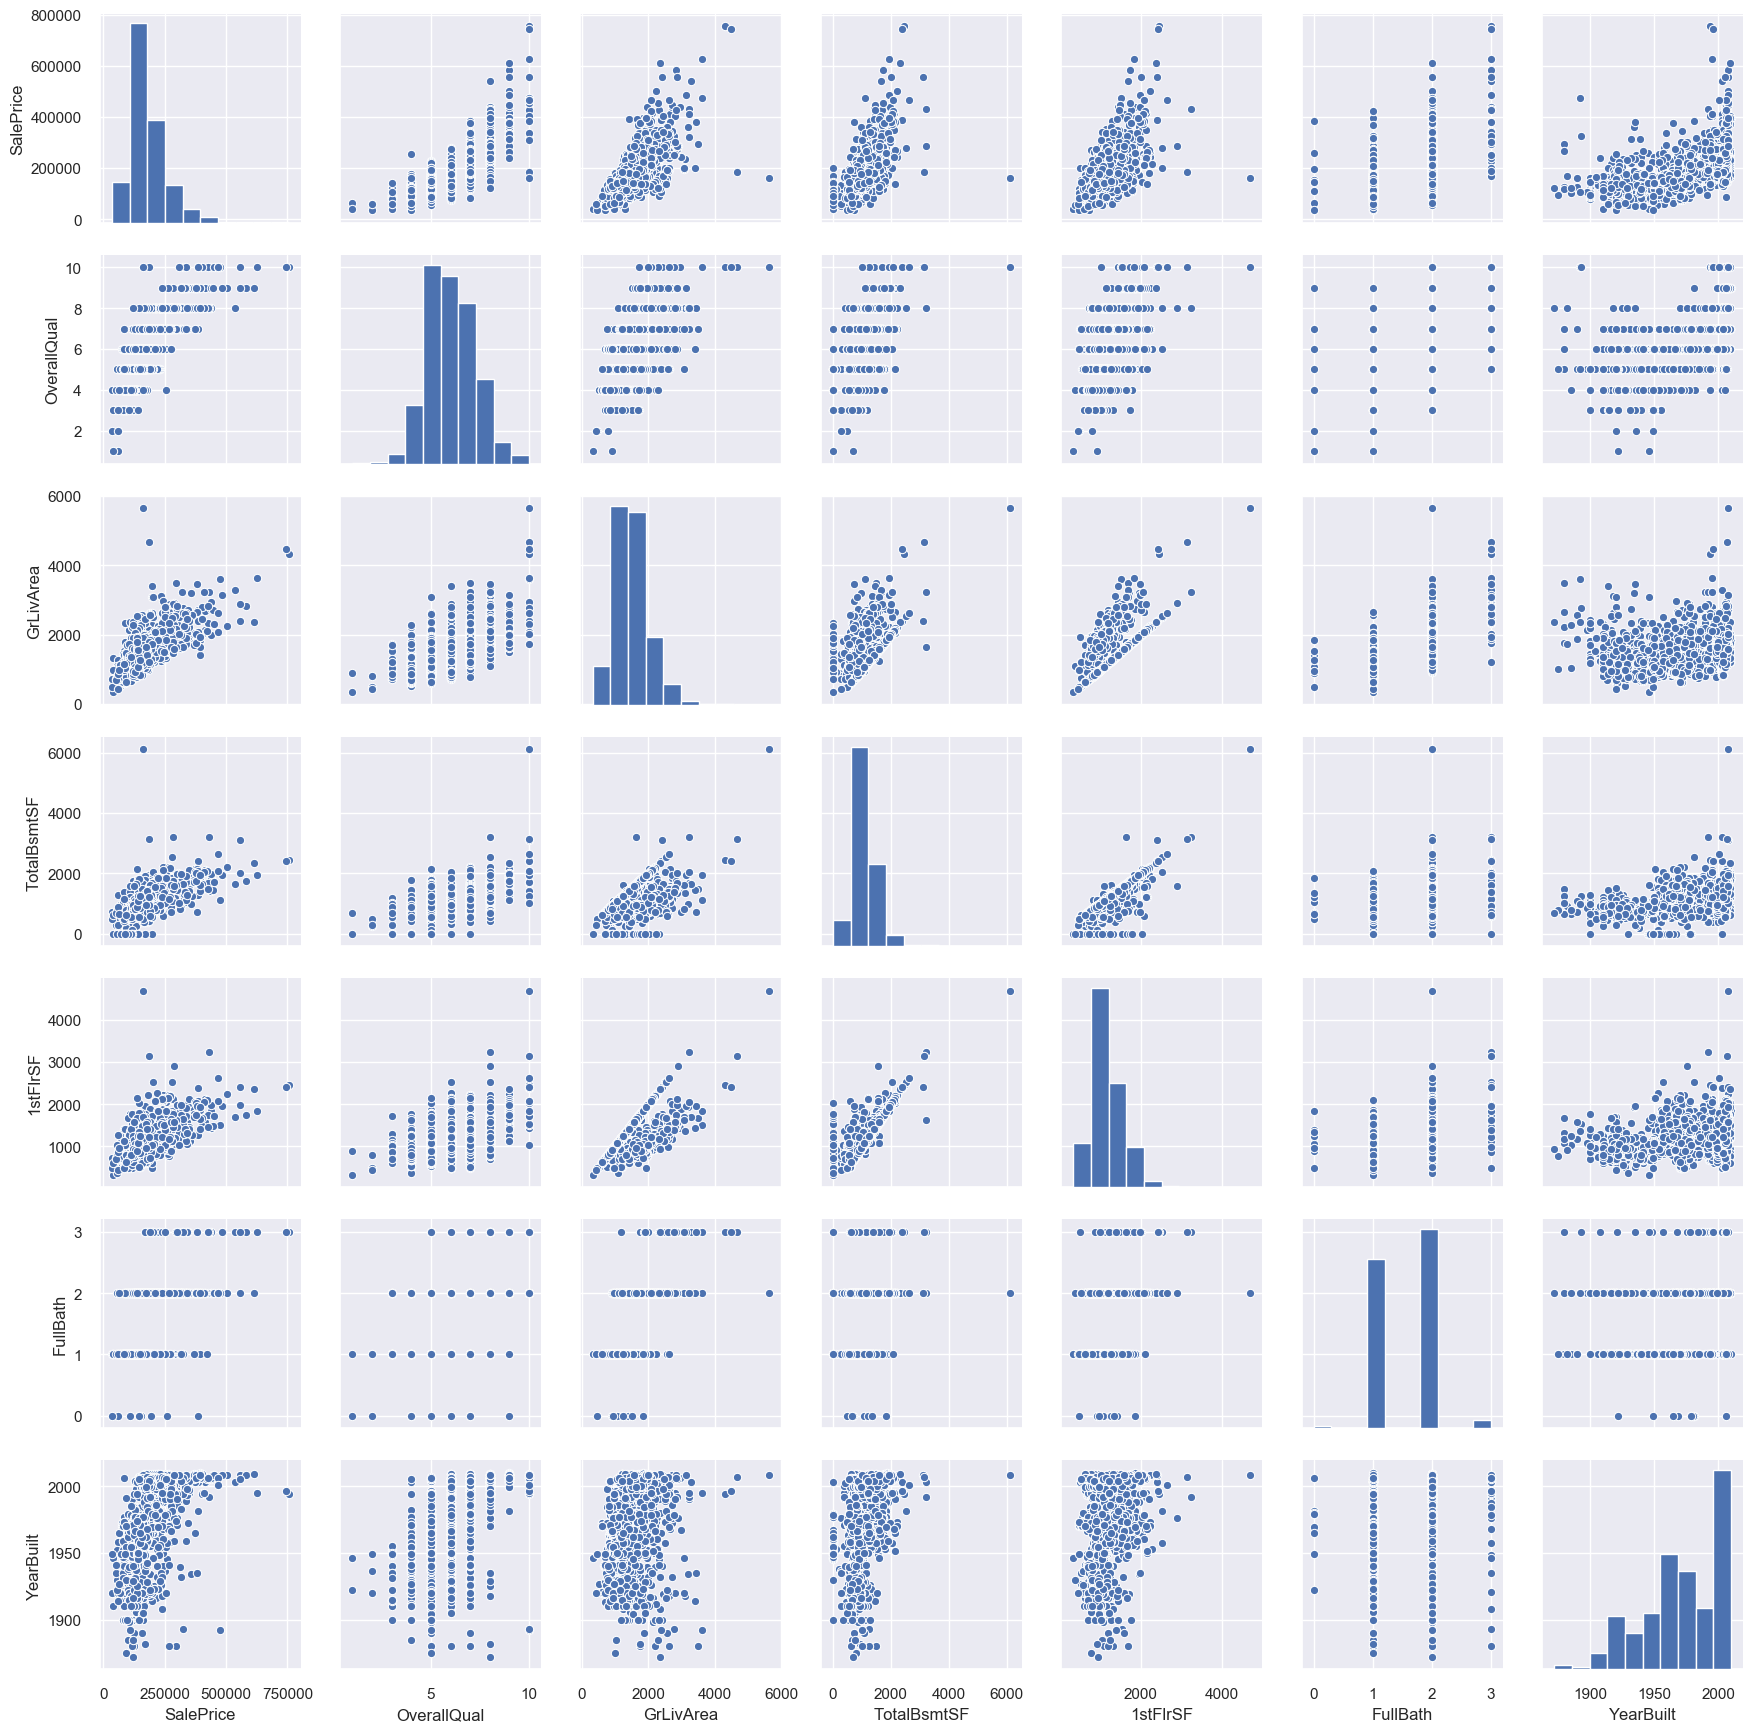

In [98]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'TotalBsmtSF','1stFlrSF', 'FullBath', 'YearBuilt']
sns.pairplot(data_train[cols], size = 2.5)


### Handling Categorical values

In [95]:
# Get list of categorical variables
s = (data_train.dtypes == 'object')
cols_cat = list(s[s].index)

print("Categorical variables:")
print(cols_cat)

# Get list of numerical variables
s = (data_train.dtypes != 'object')
cols_num = list(s[s].index)

print("Categorical variables:")
print(cols_num)


### Types of Encoding
# 1.Label Encoding
from sklearn.preprocessing import LabelEncoder
# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
col_label=[]
data_label=data_train.copy()

for col in cols_cat:
    data_train[col] = label_encoder.fit_transform(data_train[col])


Categorical variables:
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']
Categorical variables:
['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


### Feature Engineering

In [100]:
X=data_train.iloc[:,:-1]
y=data_train.iloc[ :, -1:]

### 1. Feature Selection

#### 1.Univariate feature selection

     Univariate feature selection works by selecting the best features using univariate statistical tests such as chi-square. It examines each feature individually to determine the strength of the relationship of the feature with the response variable. SelectKBest is one of the univariate methods which removes all but the specified number of highest scoring features.


In [25]:
from sklearn.feature_selection import SelectKBest, chi2

X_10_best= SelectKBest(chi2, k=10).fit(X, y)
mask = X_10_best.get_support() #list of booleans for selected features
new_feat = [] 
for bool, feature in zip(mask, X.columns):
    if bool:
        new_feat.append(feature)
print("The best features are:{}".format(new_feat)) # The list of your 10 best features

The best features are:['LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'PoolArea', 'MiscVal']


#### 2.Recursive feature elimination (RFE)
    Unlike the univariate method, RFE starts by fitting a model on the entire set of features and computing an importance score for each predictor. The weakest features are then removed, the model is re-fitted, and importance scores are computed again until the specified number of features are used. Features important score are ranked by the model’s coef_ or feature_importances_ attributes, and by recursively eliminating a small number of features per loop.

In [27]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

estimator = RandomForestClassifier(random_state = 42)
selector = RFE(estimator, 10, step=1)
selector = selector.fit(X, y)
rfe_mask = selector.get_support() #list of booleans for selected features
new_features = [] 
for bool, feature in zip(rfe_mask, X.columns):
    if bool:
        new_features.append(feature)
new_features # The list of your 10 best features

/opt/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.6/site-packages

/opt/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: F

['LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'GarageArea',
 'MoSold']

#### 3.Recursive feature elimination with cross-validation (RFECV)
RFE requires a specified number of features to keep, however it is usually not known in advance how many features are valid. To find the optimal number of features, cross-validation is used with RFE to score different feature subsets and select the best scoring collection of features.


Optimal number of features : 17
Best features : ['LotArea', 'Neighborhood', 'YearBuilt', 'YearRemodAdd', 'Exterior2nd', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'TotRmsAbvGrd', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold']


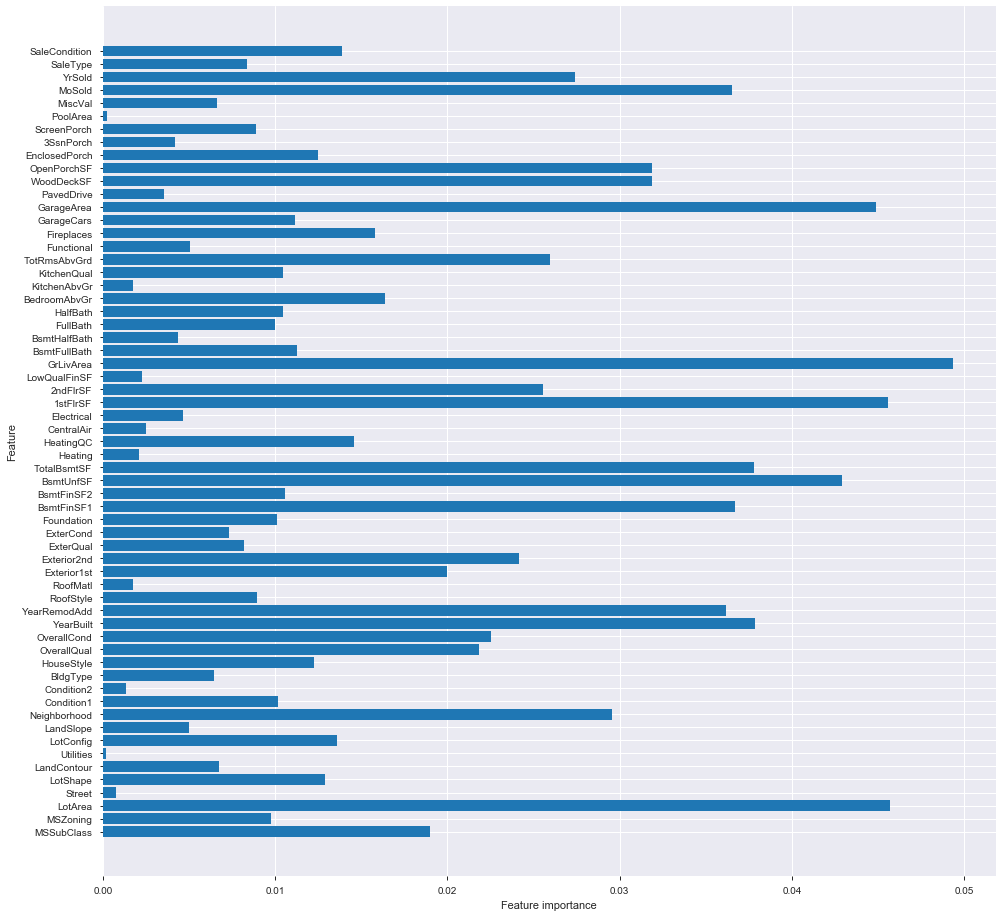

In [31]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

cv_estimator = RandomForestClassifier(random_state =42)
cv_estimator.fit(X, y)
cv_selector = RFECV(cv_estimator,cv= 5, step=1,scoring='accuracy')
cv_selector = cv_selector.fit(X, y)
rfecv_mask = cv_selector.get_support() #list of booleans
rfecv_features = [] 
for bool, feature in zip(rfecv_mask, X.columns):
    if bool:
        rfecv_features.append(feature)
print('Optimal number of features :', cv_selector.n_features_)
print('Best features :', rfecv_features)


n_features = X.shape[1]
plt.figure(figsize=(16,16))
plt.barh(range(n_features), cv_estimator.feature_importances_, align='center') 
plt.yticks(np.arange(n_features), X.columns.values) 
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

### Model Building

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score 

Score: 0.8227730933662003
Intercept: [1494335.64890448]
MAE: 22153.06510644021
MSE: 1261807357.671598
RMSE: 35521.92784283531
R2 score: 0.7998281240205225


Text(0, 0.5, 'y_pred')

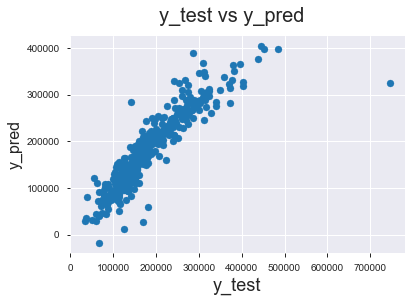

In [57]:
## All fetures 61

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
reg = LinearRegression().fit(X_train, y_train)

print("Score:",reg.score(X, y))
print("Intercept:",reg.intercept_)
## Prediction

y_pred = reg.predict(X_test)

## Score Calculation
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score:', r2_score(y_test, y_pred))



#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

Score: 0.7367724561201195
Intercept: [-832753.07291636]
MAE: 23722.24787307632
MSE: 1190456903.1086714
RMSE: 34502.99846547647
R2 score: 0.8111470898317574


Text(0, 0.5, 'y_pred')

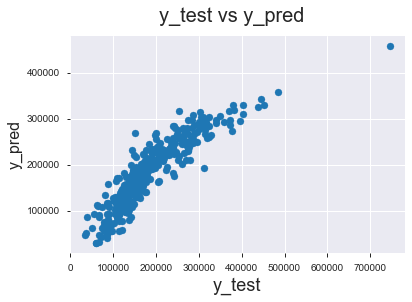

In [62]:
## After Feature selection 17 features
X_17=X[rfecv_features]


X_train, X_test, y_train, y_test = train_test_split(X_17, y, test_size=0.3, random_state=42)
reg = LinearRegression().fit(X_train, y_train)

print("Score:",reg.score(X_17, y))
print("Intercept:",reg.intercept_)
## Prediction

y_pred = reg.predict(X_test)

## Score Calculation
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score:', r2_score(y_test, y_pred))



#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   